In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from math import exp, pi

In [3]:
a = 0.8
sigma = 1
u = np.linspace(start=-1, stop=1, dtype=np.float32)
L = [1+a-a*exp(-2*pi*sigma**2*x**2) for x in u]

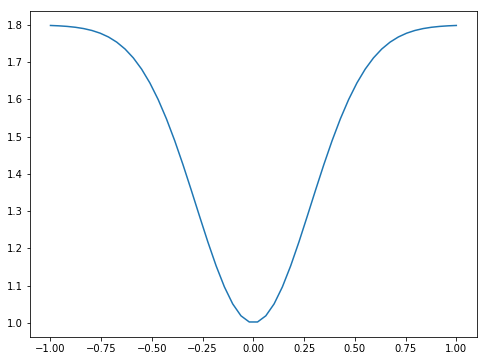

In [4]:
fig = plt.figure(figsize=(8, 6))
plt.plot(u,L)
plt.show()
fig.savefig('q6.png', dpi=fig.dpi)

In [5]:
alpha = 0.10
l1 = np.linspace(start=0, stop=0.5, dtype=np.float32)
l2 = np.linspace(start=0, stop=0.5, dtype=np.float32)
lambda1,lambda2 = np.meshgrid(l1, l2)

In [6]:
Q = lambda1*lambda2 - alpha*np.power(lambda1+lambda2,2)

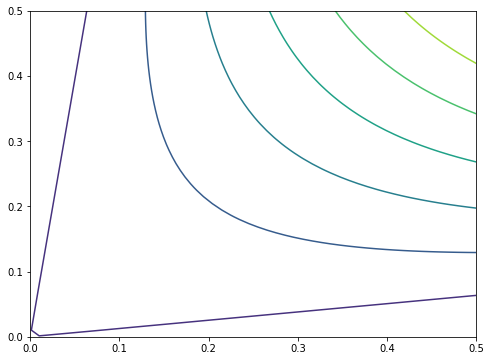

In [7]:
fig = plt.figure(figsize=(8, 6))
plt.contour(lambda1, lambda2, Q)
plt.show()
fig.savefig('q9.png', dpi=fig.dpi)

In [8]:
from PIL import Image
import scipy.misc
from matplotlib import cm
from scipy import ndimage

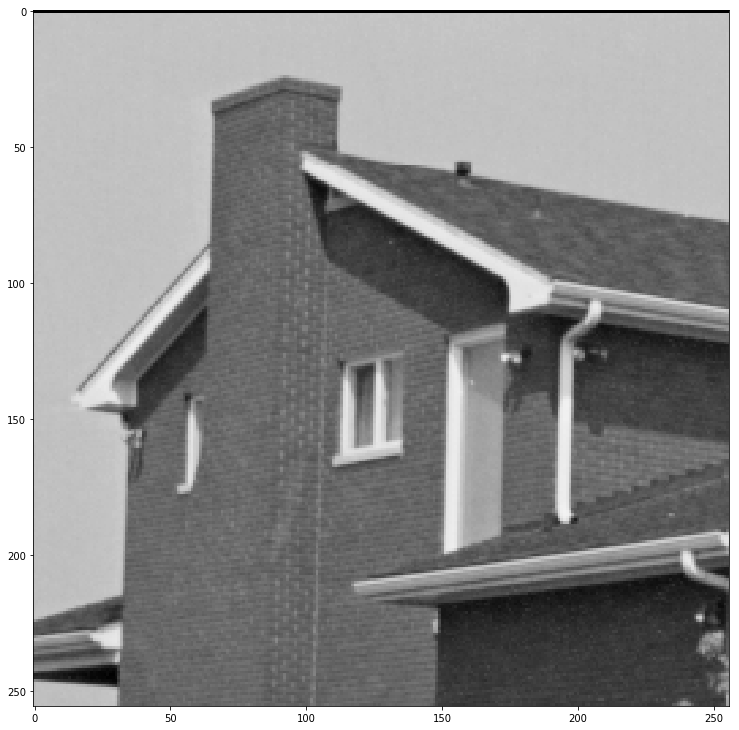

In [9]:

# reading original image
a = Image.open('image-house.gif')
I = np.asarray(a, dtype=np.int32)
(M,N) = I.shape
# plotting image
plt.figure(1,figsize=(M/20,N/20))
fig1 = plt.imshow(I,cmap=cm.gray,vmin=0,vmax=255)

In [10]:
def getHarrisCornerResponse(I, h, alpha, threshold=0.8):
    '''
    This function calculate the Harris corner response funciton
    
    Inputs:
    * I: 2*2 array of Image with grey levels
    * h: filter, uniform, gaussian, etc.
    * alpha: parameter of the corner response equation
    * threshold: if <1, apply threshold based on the maximum of corner response value, otherwise, directly apply input value
    
    Outputs:
    * Q: Matrix container response value
    * coordinates: 
        tuple contains two arrays, 
            first array is the x coordiate of the potins has corner response value larger than threshold
            second array is the y coordiate of the potins has corner response value larger than threshold
    '''
    (M,N) = I.shape
    hx = np.array([[0,0.5,0],[0,0,0],[0,-0.5,0]])
    Ix = scipy.ndimage.filters.convolve(I,hx)
    Ix2 = np.power(Ix, 2)
    hy = hx.transpose()
    Iy = scipy.ndimage.filters.convolve(I,hy)
    Iy2 = np.power(Iy, 2)
    IxIy =  scipy.ndimage.filters.convolve(Ix,hy)
    ul =  scipy.ndimage.filters.convolve(Ix2,h)
    ur =  scipy.ndimage.filters.convolve(IxIy,h)
    bl =  scipy.ndimage.filters.convolve(IxIy,h)
    br = scipy.ndimage.filters.convolve(Iy2,h)
    Q_alpha = np.zeros((M,N))
    for i_ind in range(M):
        for j_ind in range(N):
            m_bar = np.array([[ul[i_ind,j_ind], ur[i_ind,j_ind]],[bl[i_ind,j_ind],br[i_ind,j_ind]]])
            Q_alpha[i_ind,j_ind] = np.linalg.det(m_bar) - alpha*(np.trace(m_bar))**2
    if threshold<=1:
        t = np.max(Q_alpha)*threshold
    else:
        t= threshold
    coordinates = np.where(Q_alpha>t)
    return Q_alpha, coordinates

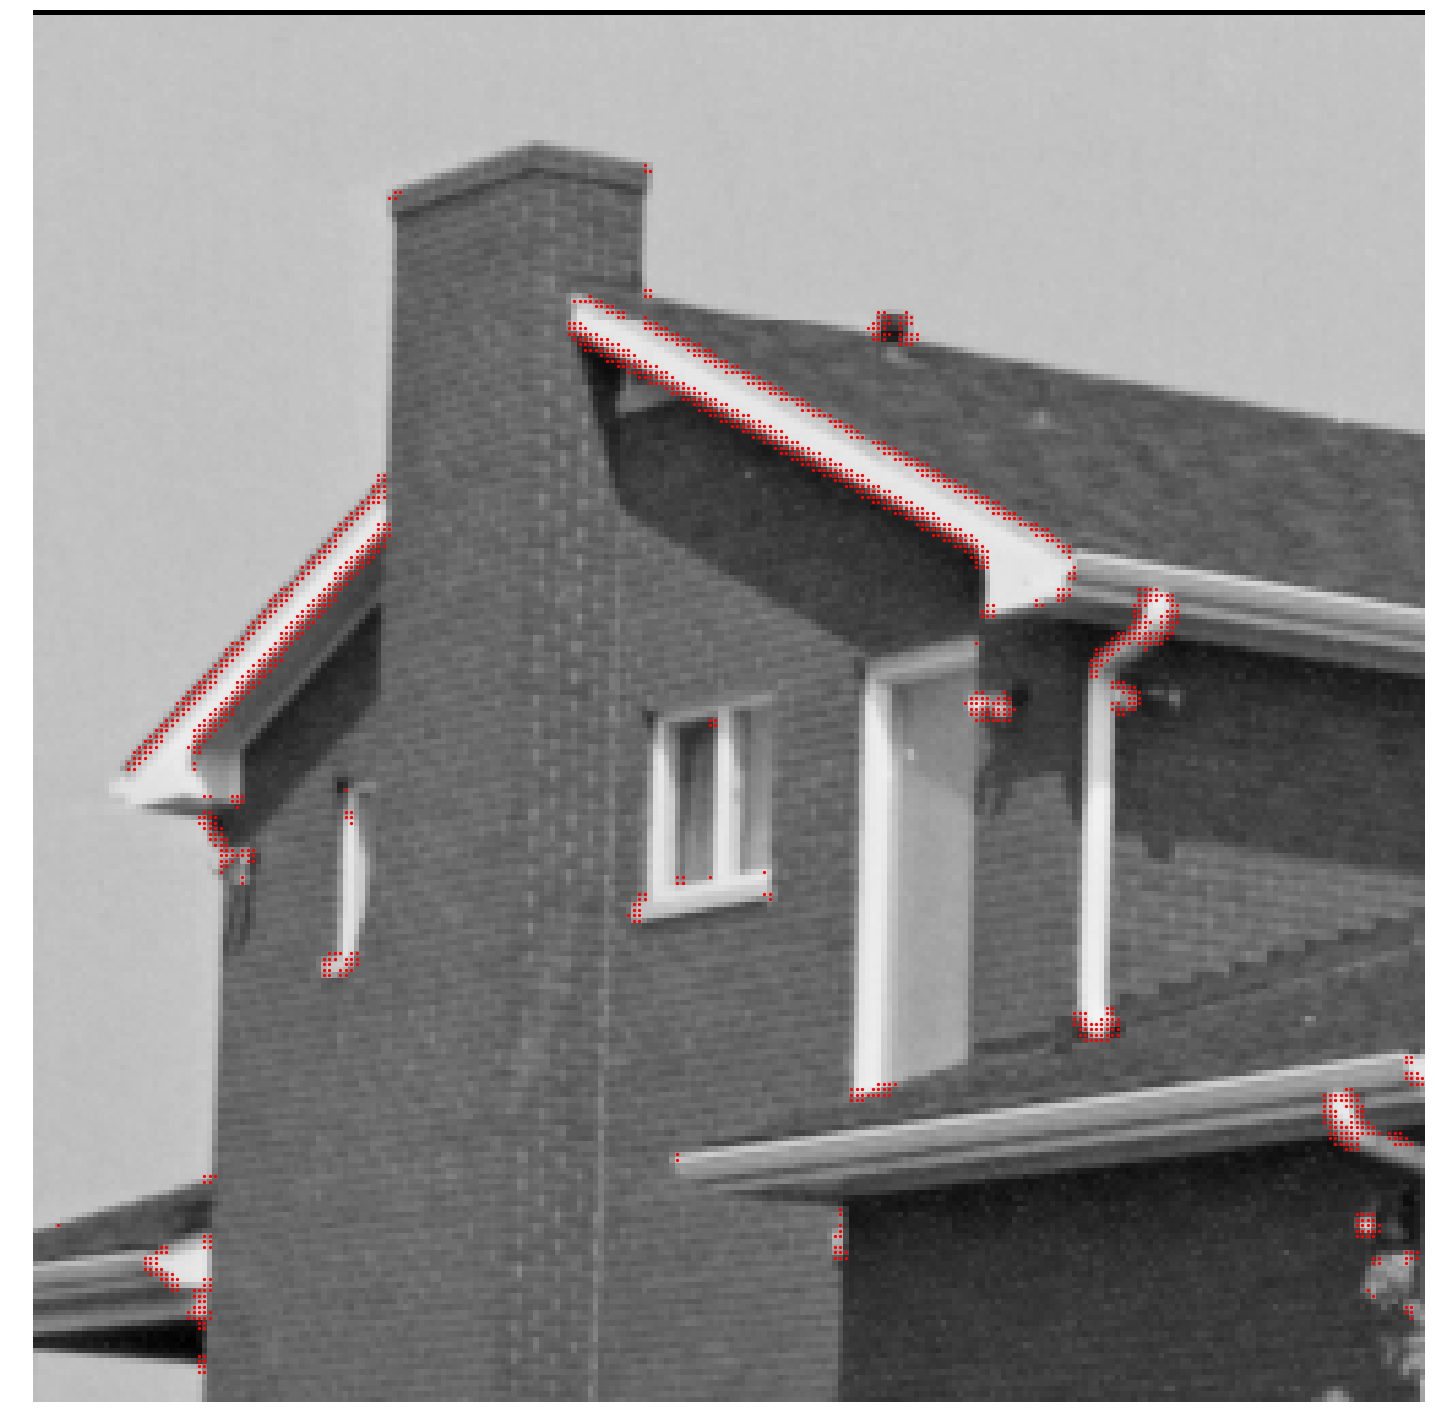

In [11]:
n = 3
w = np.ones(shape=(n,n))
h = w
Q,coordinates = getHarrisCornerResponse(I,h,0.05, 0.03)
fig=plt.figure(1,figsize=(M/10,N/10))
plt.imshow(I,cmap=cm.gray,vmin=0,vmax=255)
plt.scatter(coordinates[1],coordinates[0],c='r', s=5)
plt.axis('off')
fig.savefig('q9_house_uniform_filter.png', dpi=fig.dpi)

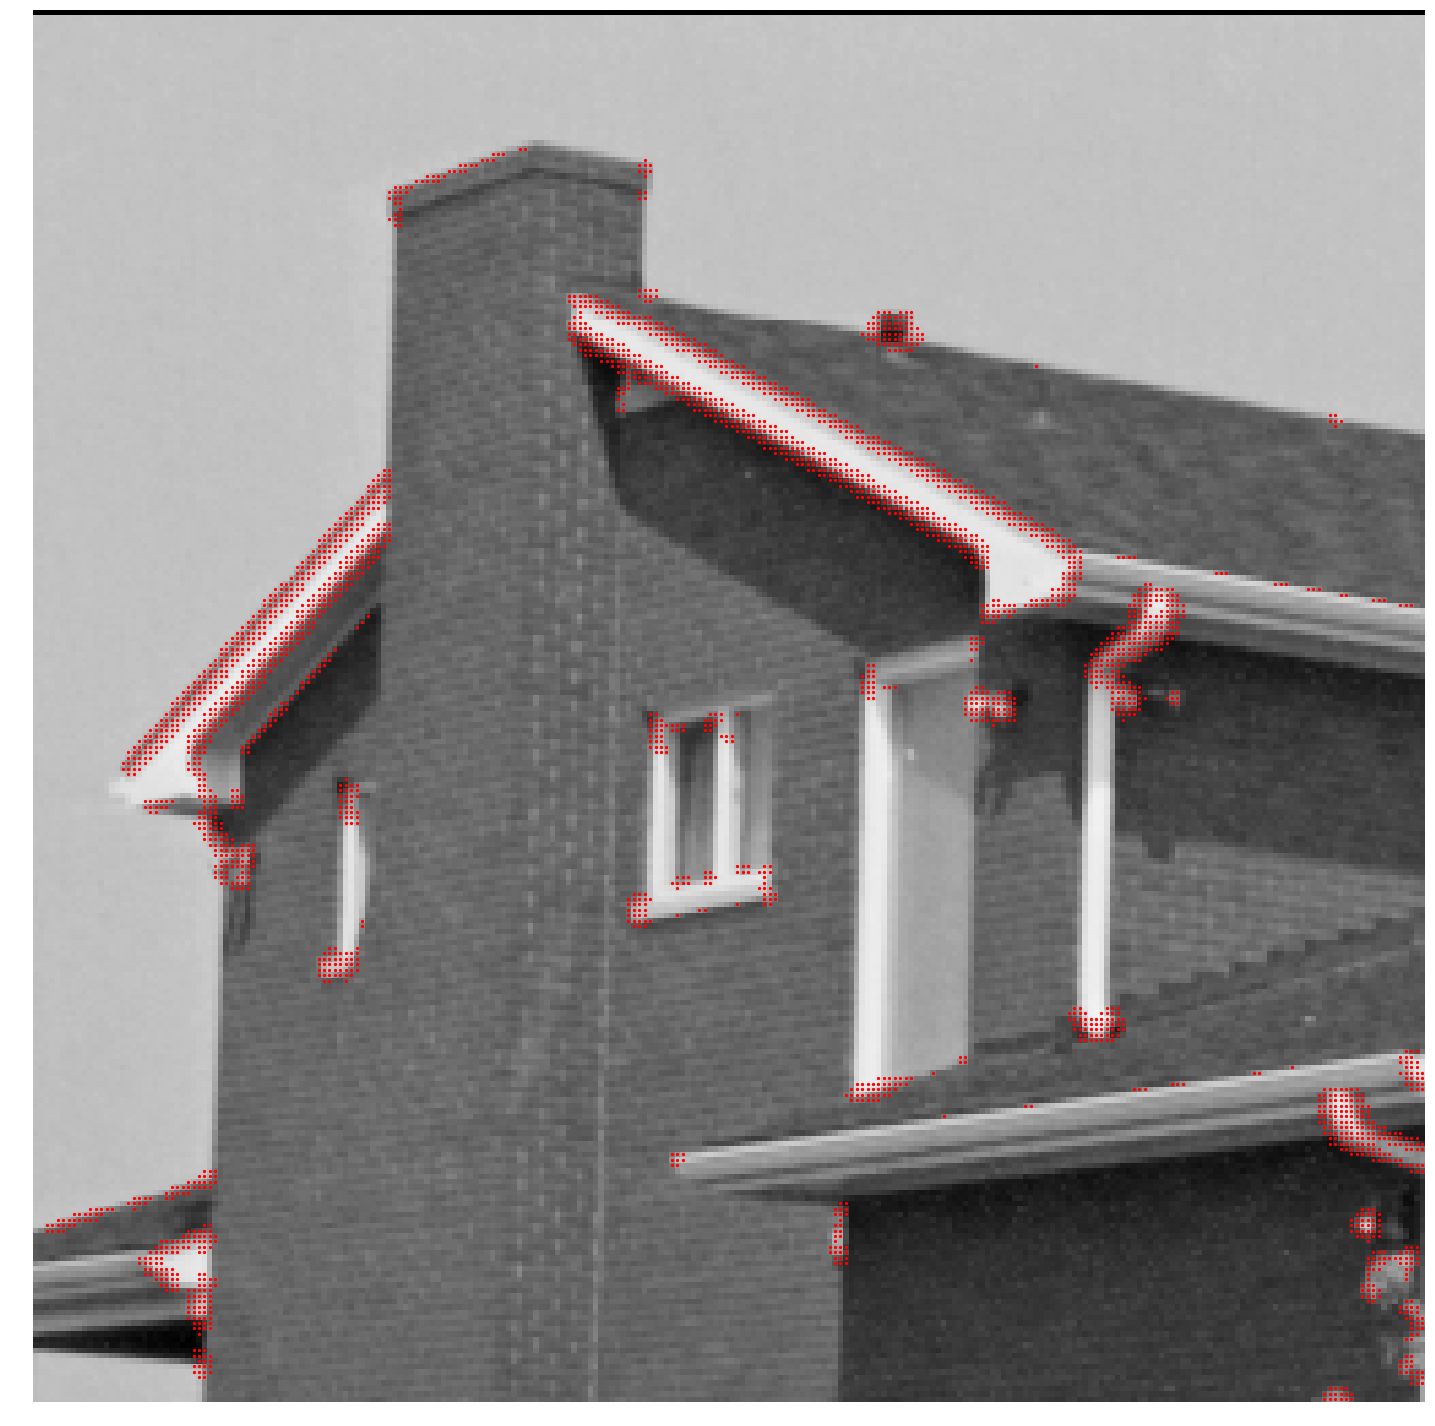

In [12]:
def gaussian(x,y,sigma):
    return exp(-(x**2+y**2)/(2*sigma**2))
n = 5
sigma=1
_hG = np.array([[ gaussian(r, c, sigma) for c in range(int(-(n-1)/2),int((n-1)/2 + 1))] 
                for r in range(int(-(n-1)/2),int((n-1)/2 + 1))])
hG = _hG/np.sum(_hG)
Q,coordinates = getHarrisCornerResponse(I,hG,0.05, 0.01)
fig=plt.figure(1,figsize=(M/10,N/10))
plt.imshow(I,cmap=cm.gray,vmin=0,vmax=255)
plt.scatter(coordinates[1],coordinates[0],c='r', s=5)
plt.axis('off')
fig.savefig('q9_house_gaussian_filter.png', dpi=fig.dpi)

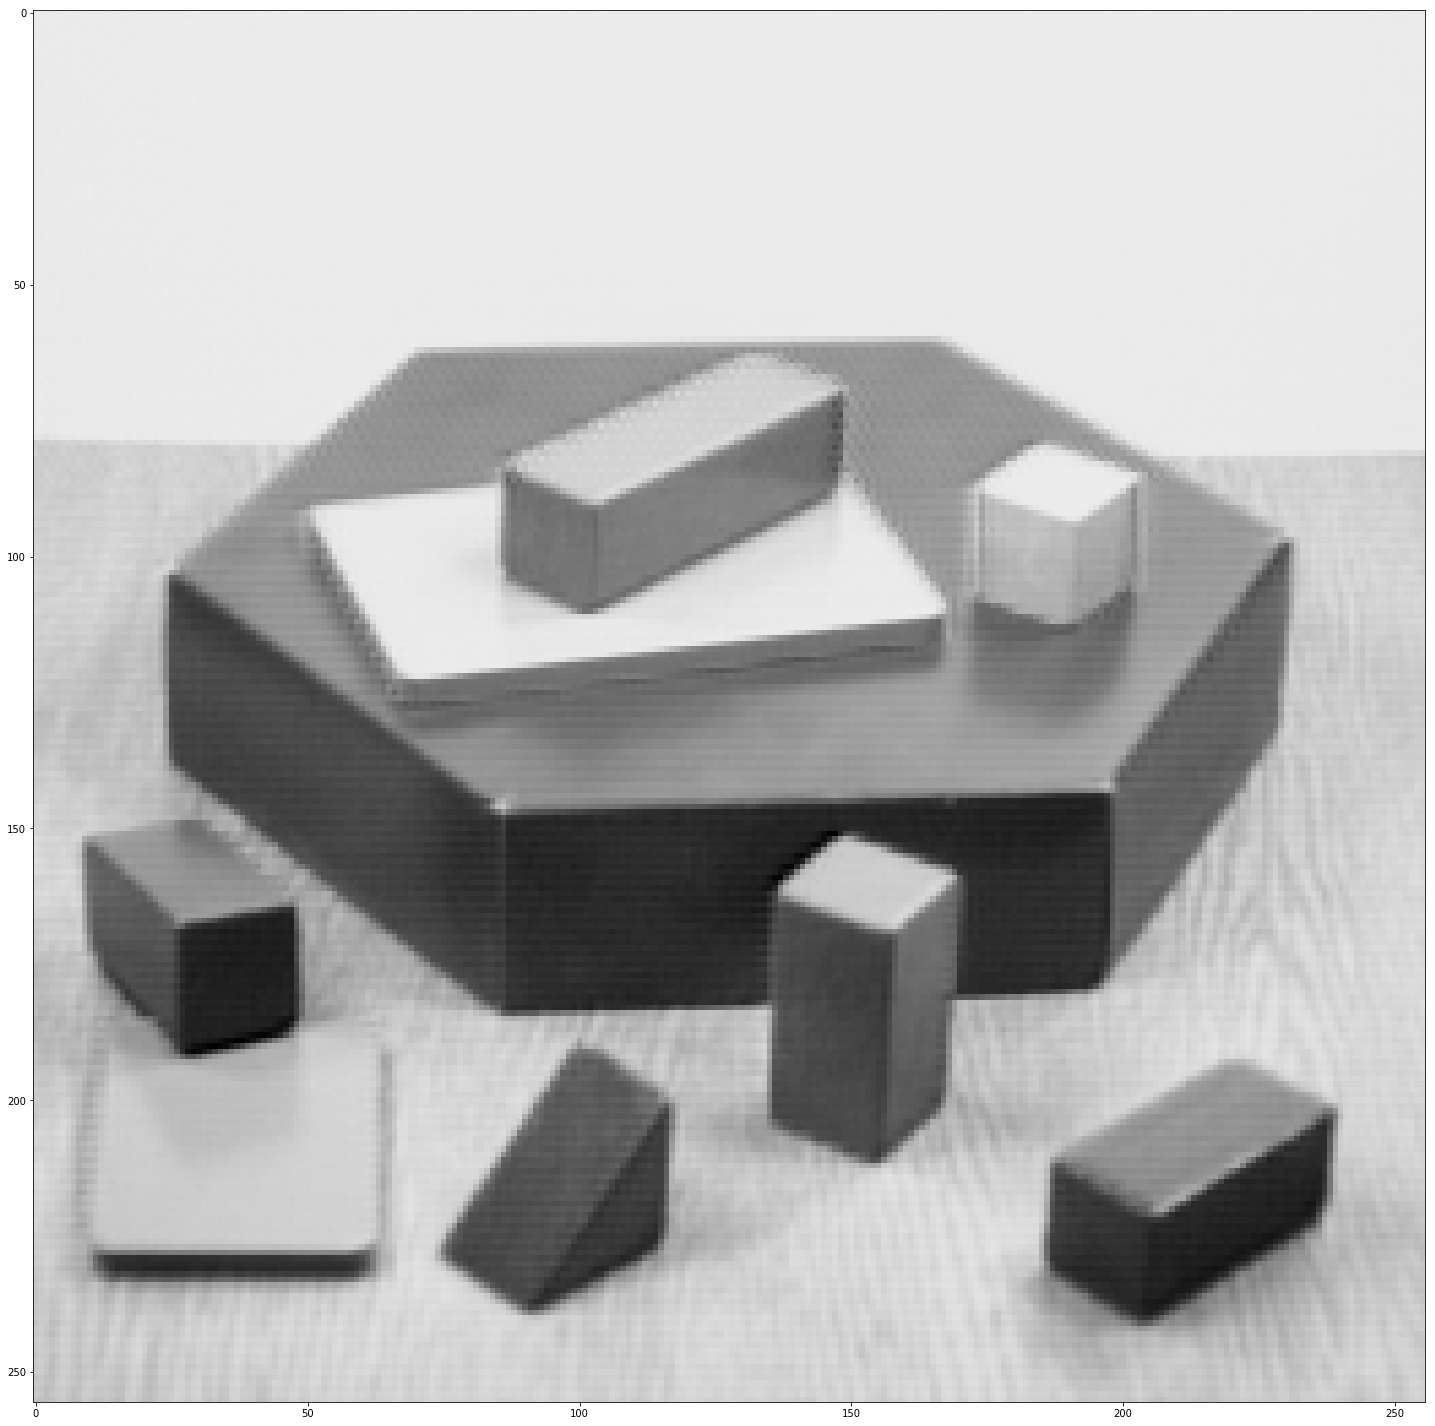

In [13]:

# reading original image
a = Image.open('image-polygons.gif')
I = np.asarray(a, dtype=np.int32)
(M,N) = I.shape
# plotting image
plt.figure(1,figsize=(M/10,N/10))
fig1 = plt.imshow(I,cmap=cm.gray,vmin=0,vmax=255)

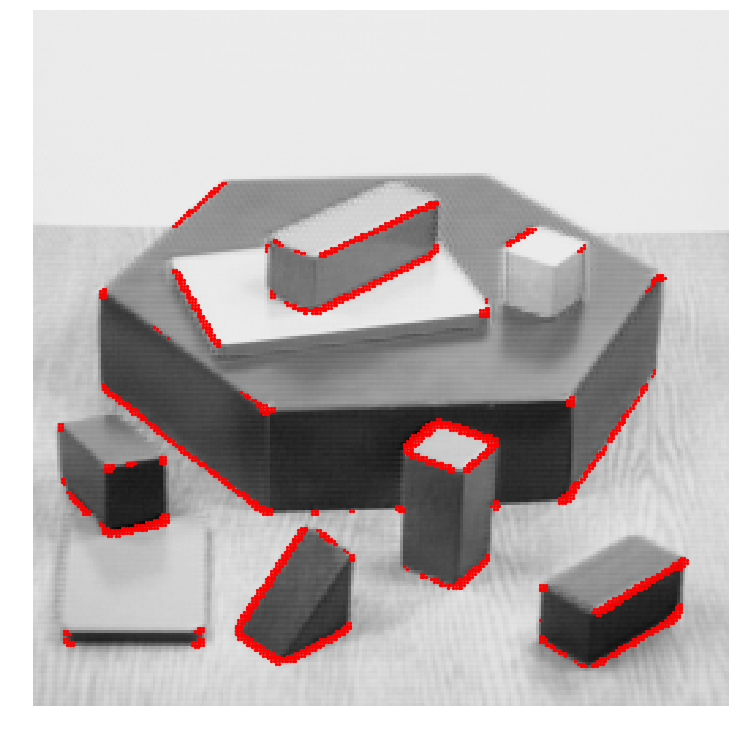

In [14]:
n = 3
w = np.ones(shape=(n,n))
h = w
Q,coordinates = getHarrisCornerResponse(I,h,0.01, 1e7)
fig=plt.figure(1,figsize=(M/20,N/20))
plt.imshow(I,cmap=cm.gray,vmin=0,vmax=255)
plt.scatter(coordinates[1],coordinates[0],c='r', s=5)
plt.axis('off')
fig.savefig('q9_polygons_uniform_filter.png', dpi=fig.dpi)

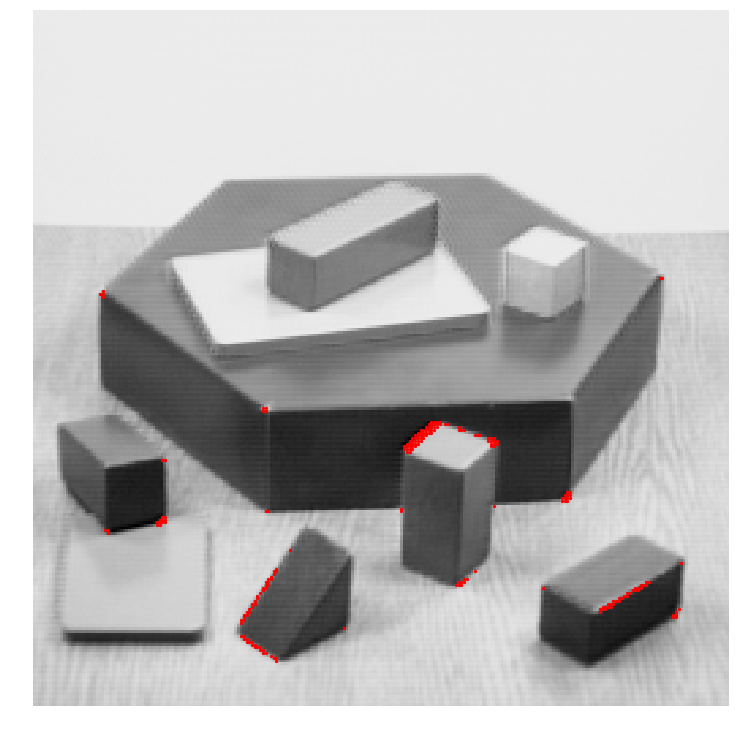

In [15]:
n = 5
sigma=1
_hG = np.array([[ gaussian(r, c, sigma) for c in range(int(-(n-1)/2),int((n-1)/2 + 1))] 
                for r in range(int(-(n-1)/2),int((n-1)/2 + 1))])
hG = _hG/np.sum(_hG)
Q,coordinates = getHarrisCornerResponse(I,hG,0.05, 0.1)
fig=plt.figure(1,figsize=(M/20,N/20))
plt.imshow(I,cmap=cm.gray,vmin=0,vmax=255)
plt.scatter(coordinates[1],coordinates[0],c='r', s=5)
plt.axis('off')
fig.savefig('q9_polygons_gaussian_filter.png', dpi=fig.dpi)

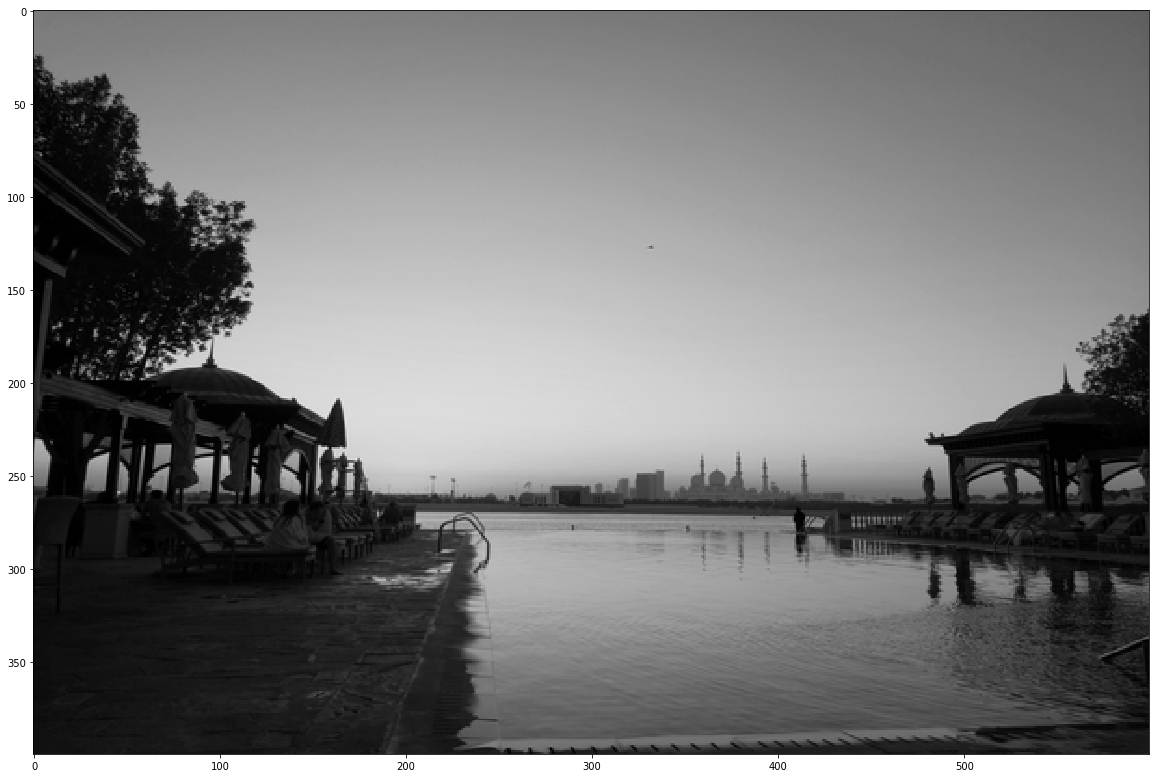

In [16]:
# reading original image
a = Image.open('uae.jpg')
a = a.convert('L') # convert image to black and white
a = a.resize((600, 400), Image.ANTIALIAS)
I = np.asarray(a, dtype=np.int32)
(M,N) = I.shape
# plotting image
plt.figure(1,figsize=(M/20,N/20))
fig1 = plt.imshow(I,cmap=cm.gray,vmin=0,vmax=255)

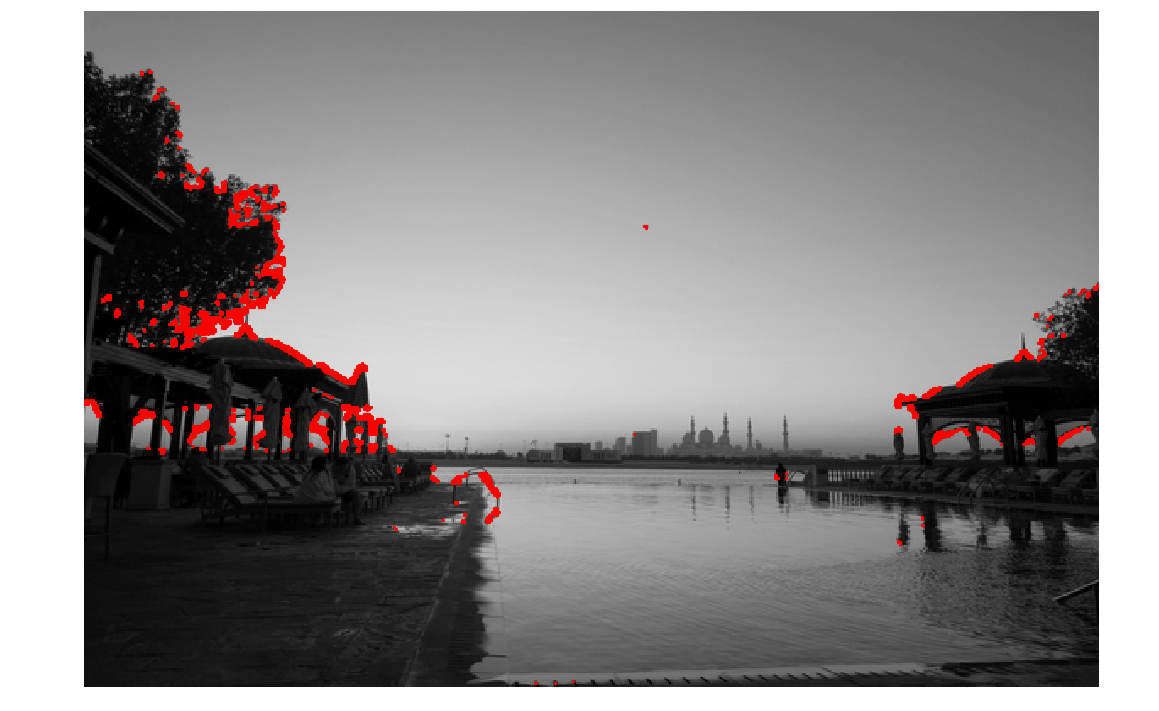

In [17]:
n = 3
w = np.ones(shape=(n,n))
h = w
Q,coordinates = getHarrisCornerResponse(I,h,0.05, 0.05)
fig=plt.figure(1,figsize=(M/20,N/20))
plt.imshow(I,cmap=cm.gray,vmin=0,vmax=255)
plt.scatter(coordinates[1],coordinates[0],c='r', s=5)
plt.axis('off')
fig.savefig('q9_uae_uniform_filter.png', dpi=fig.dpi)

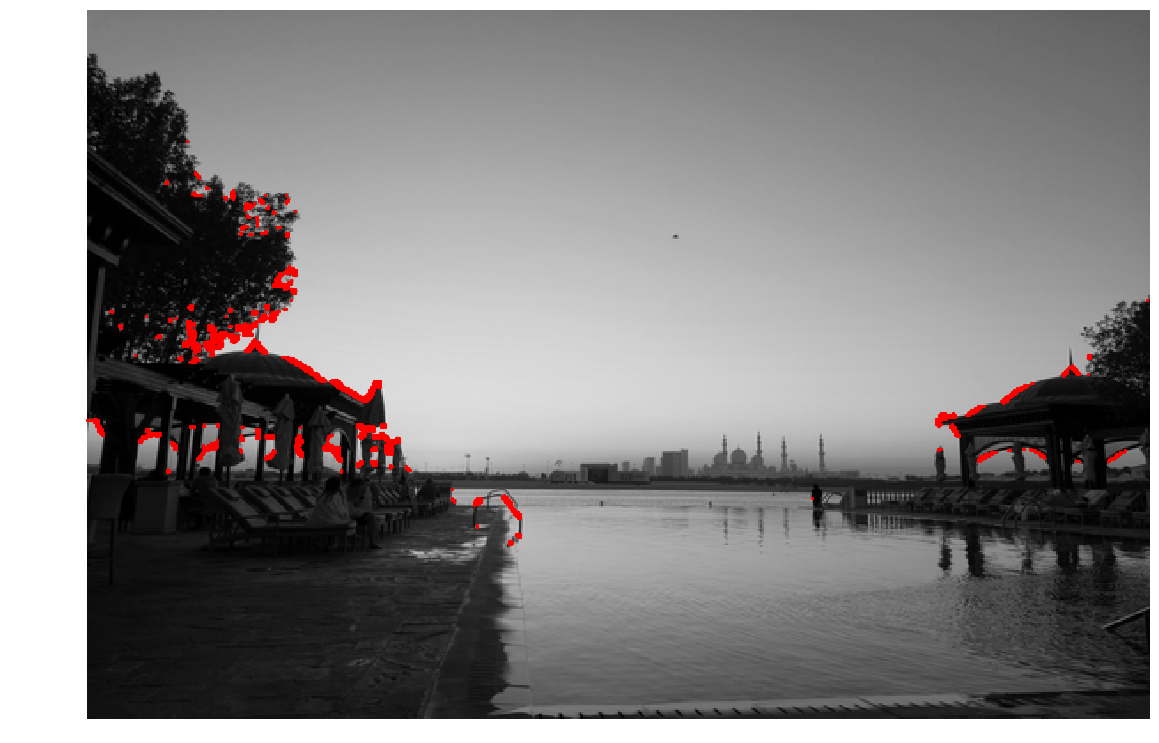

In [18]:
n = 5
sigma=1
_hG = np.array([[ gaussian(r, c, sigma) for c in range(int(-(n-1)/2),int((n-1)/2 + 1))] 
                for r in range(int(-(n-1)/2),int((n-1)/2 + 1))])
hG = _hG/np.sum(_hG)
Q,coordinates = getHarrisCornerResponse(I,hG,0.05, 0.1)
fig=plt.figure(1,figsize=(M/20,N/20))
plt.imshow(I,cmap=cm.gray,vmin=0,vmax=255)
plt.scatter(coordinates[1],coordinates[0],c='r', s=5)
plt.axis('off')
fig.savefig('q9_uae_gaussian_filter.png', dpi=fig.dpi)